In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Making Plots Actually look nice

If one has SciencePlots (https://github.com/garrettj403/SciencePlots) installed has additional options for matplotlib

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

## Quick Plotting
### Line Plots

Simple plotting commands to look at data quickly

In [3]:
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.1*np.random.randn(len(x))

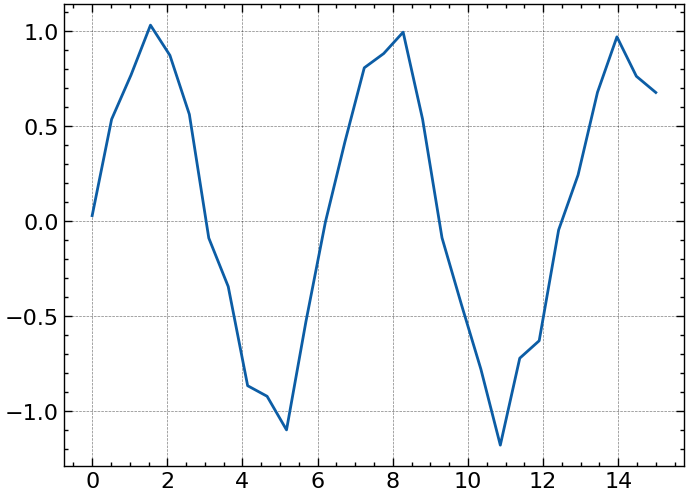

In [4]:
plt.plot(x, y)

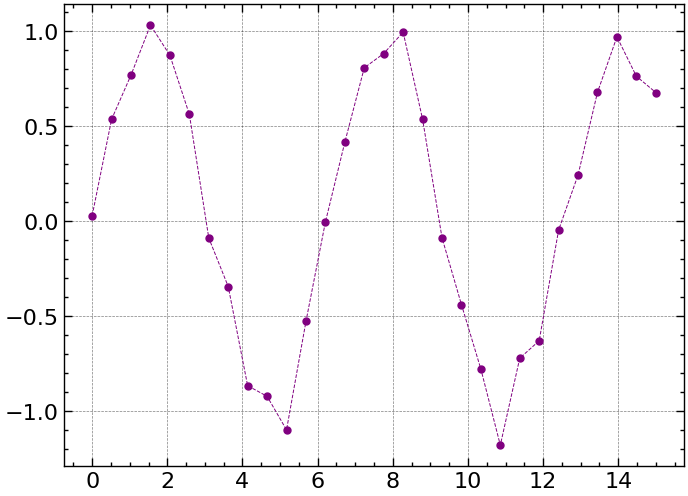

In [5]:
plt.plot(x, y, 'o--', color = 'purple', lw = 0.7, ms = 5)

Figure size

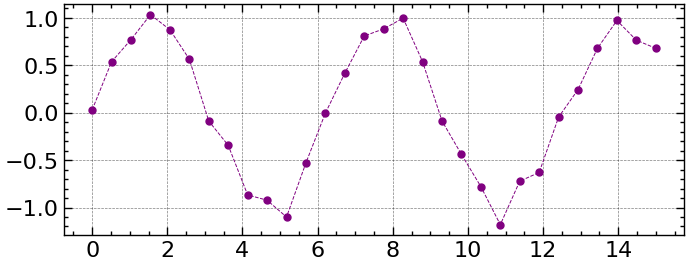

In [6]:
plt.figure(figsize = (8, 3))
plt.plot(x, y, 'o--', color = 'purple', lw = 0.7, ms = 5)

Axis labels

Text(0, 0.5, 'Voltage [V]')

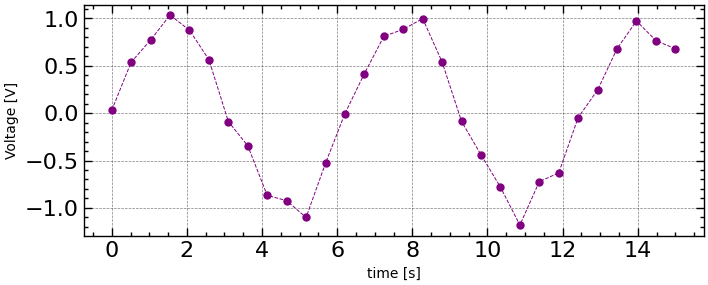

In [7]:
plt.figure(figsize = (8, 3))
plt.plot(x, y, 'o--', color = 'purple', lw = 0.7, ms = 5)
plt.xlabel('time [s]')
plt.ylabel('Voltage [V]')

Legend

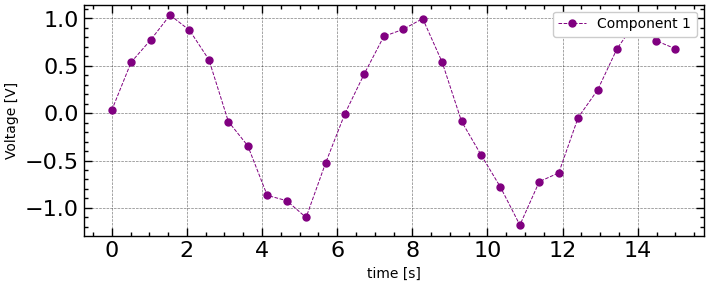

In [8]:
plt.figure(figsize = (8, 3))
plt.plot(x, y, 'o--', color = 'purple', lw = 0.7, ms = 5, label = 'Component 1')
plt.xlabel('time [s]')
plt.ylabel('Voltage [V]')
plt.legend(loc = 'upper right', fontsize = 10)

Easy to have multiple lines on same plot

In [9]:
x2 = np.linspace(0, 15, 100)
y2 = np.sin(x2)

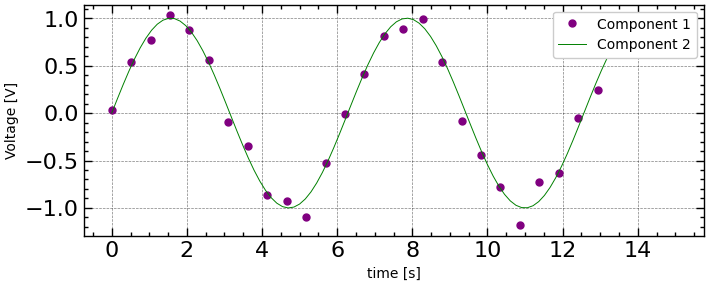

In [10]:
plt.figure(figsize = (8, 3))
plt.plot(x, y, 'o', color = 'purple', lw = 0.7, ms = 5, label = 'Component 1')
plt.plot(x2, y2, '-', color = 'green', lw = 0.7, ms = 5, label = 'Component 2')
plt.xlabel('time [s]')
plt.ylabel('Voltage [V]')
plt.legend(loc = 'upper right', fontsize = 10)

$x$ and $y$ limits

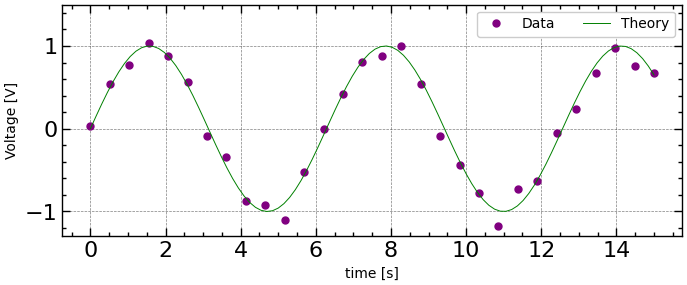

In [11]:
plt.figure(figsize = (8, 3))
plt.plot(x, y, 'o', color = 'purple', lw = 0.7, ms = 5, label = 'Data')
plt.plot(x2, y2, '-', color = 'green', lw = 0.7, ms = 5, label = 'Theory')
plt.xlabel('time [s]')
plt.ylabel('Voltage [V]')
plt.ylim(top = 1.5)
plt.legend(loc = 'upper right', fontsize = 10, ncol = 2)

### Histograms

In [12]:
res = np.random.randn(1000)*0.2 + 0.4

Quick Histogram

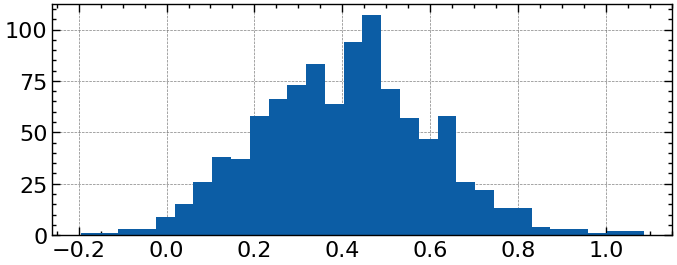

In [13]:
plt.figure(figsize = (8, 3))
a = plt.hist(res, bins = 30)

In [14]:
a

(array([  1.,   1.,   3.,   3.,   9.,  15.,  26.,  38.,  37.,  58.,  66.,
         73.,  83.,  64.,  94., 107.,  71.,  57.,  47.,  58.,  26.,  22.,
         13.,  13.,   4.,   3.,   3.,   1.,   2.,   2.]),
 array([-0.19550326, -0.15273957, -0.10997589, -0.06721221, -0.02444852,
         0.01831516,  0.06107884,  0.10384252,  0.14660621,  0.18936989,
         0.23213357,  0.27489725,  0.31766094,  0.36042462,  0.4031883 ,
         0.44595199,  0.48871567,  0.53147935,  0.57424303,  0.61700672,
         0.6597704 ,  0.70253408,  0.74529777,  0.78806145,  0.83082513,
         0.87358881,  0.9163525 ,  0.95911618,  1.00187986,  1.04464355,
         1.08740723]),
 <BarContainer object of 30 artists>)

Density plot

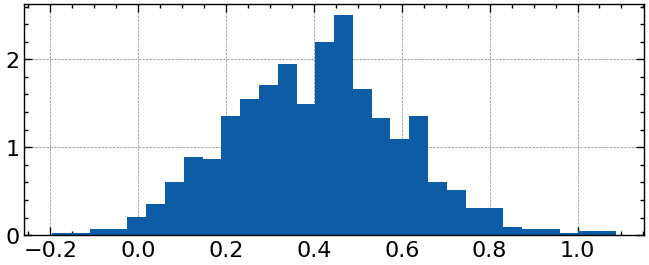

In [15]:
plt.figure(figsize = (8, 3))
a = plt.hist(res, bins = 30, density = True)

Different style of bins (useful for ploting multiple histograms)

In [16]:
res2 = np.random.randn(1000)*0.2 + 0.4

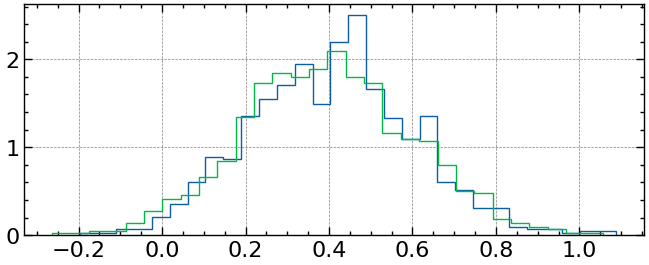

In [17]:
plt.figure(figsize=(8, 3))
plt.hist(res, bins = 30, density = True, histtype='step')
plt.hist(res2, bins = 30, density = True, histtype='step')
plt.show()

## A More Advanced API

For more complicated plots such as 

* Multiple subplots on 1 figure
* Conveniently adding text to plots
* Creating animations

one needs to use a slightly more advanced API

### Single Axes in one Figure

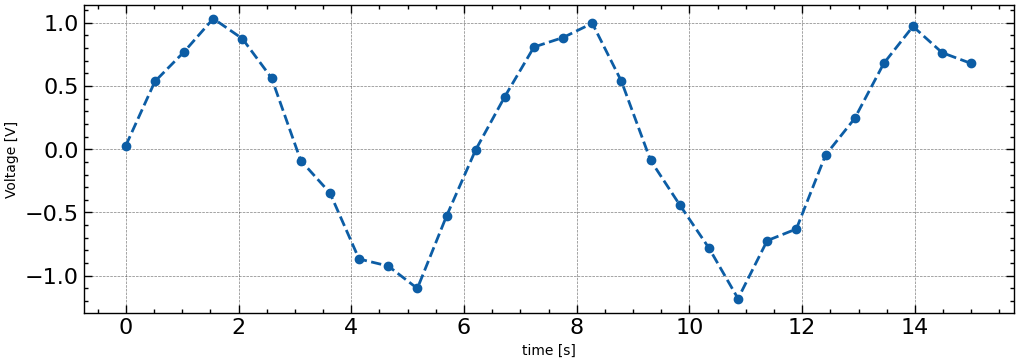

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
ax.plot(x, y, 'o--')
ax.set_xlabel('time [s]')
ax.set_ylabel('Voltage [V]')
plt.show()

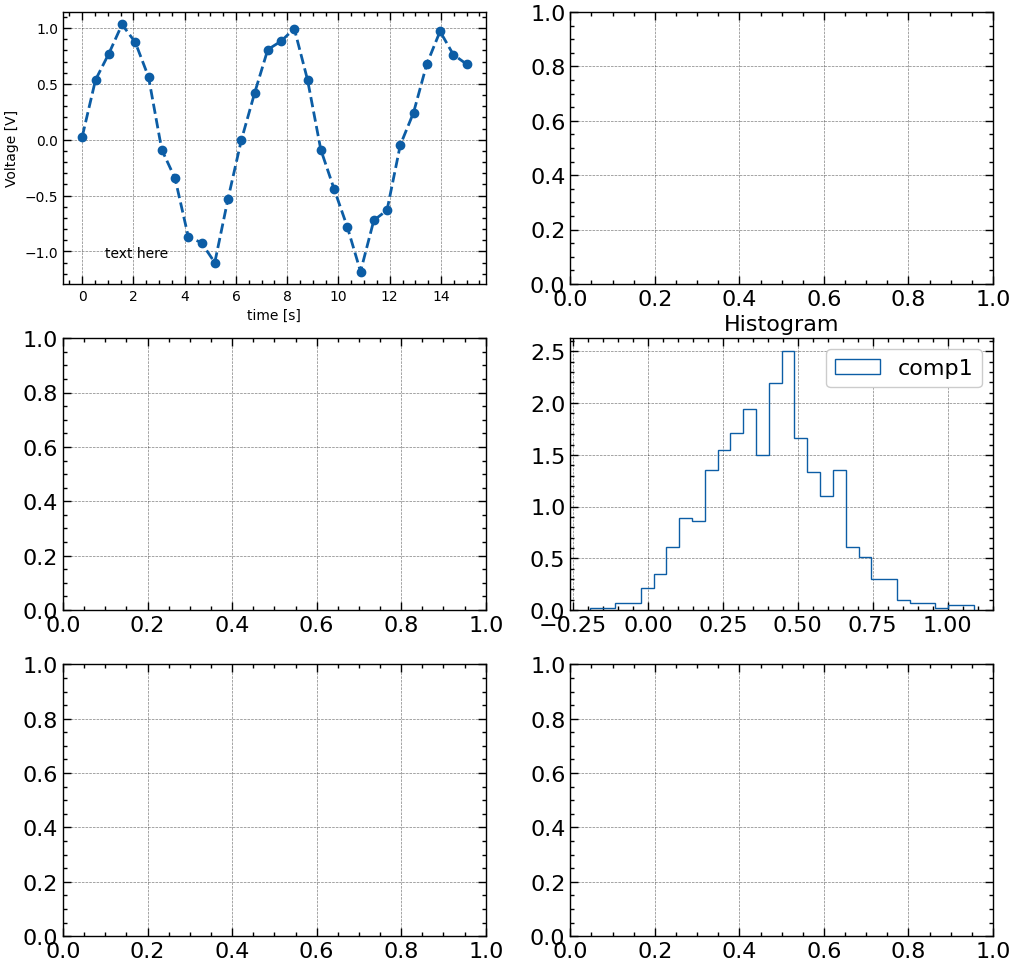

In [19]:
fig, axes = plt.subplots(3, 2, figsize = (12, 12))
ax = axes[0][0]
ax.plot(x, y, 'o--')
ax.set_xlabel('time [s]')
ax.set_ylabel('Voltage [V]')
ax.text(0.1, 0.1, 'text here', transform = ax.transAxes)
ax.tick_params(axis = 'both', labelsize = 10)
ax = axes[1][1]
ax.hist(res, bins = 30, density = True, histtype='step', label = 'comp1')
ax.legend()
ax.set_title('Histogram')
plt.show()

## Example

Creating the following plot

In [12]:
res_a1 = 0.2*np.random.randn(1000)+0.4
res_b1 = 0.25*np.random.randn(1000)+0.4
res_a2 = 0.21*np.random.randn(1000)+0.3
res_b2 = 0.22*np.random.randn(1000)+0.3

Good habit to come up with complicated strings beforehand

In [13]:
textstr1 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))))

textstr2 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a2)),
    r'$\sigma_b=%.4f$' % (np.std(res_b2))))

Make plot

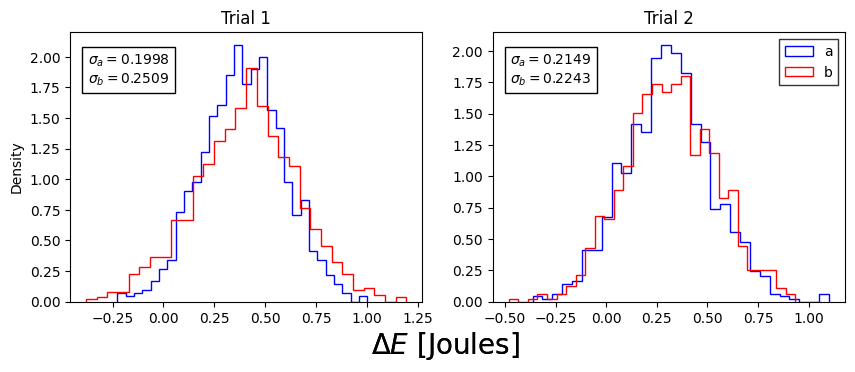

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (10, 3.5))
ax = axes[0]
ax.hist(res_a1, bins = 30, density = True, histtype = 'step', label = 'a', color = 'blue')
ax.hist(res_b1, bins = 30, density = True, histtype = 'step', label = 'b', color = 'red')
ax.text(0.05, 0.81, textstr1, transform = ax.transAxes, bbox = dict(facecolor = 'white', edgecolor = 'black'))
ax.set_ylabel('Density')
ax.set_title('Trial 1')
fig.text(0.5, -0.04, '$\Delta E$ [Joules]', ha = 'center', fontsize = 20)
ax = axes[1]
ax.hist(res_a2, bins = 30, density = True, histtype = 'step', label = 'a', color = 'blue')
ax.hist(res_b2, bins = 30, density = True, histtype = 'step', label = 'b', color = 'red')
ax.legend(loc = 'upper right', fancybox = False, edgecolor = 'black')
ax.text(0.05, 0.81, textstr2, transform = ax.transAxes, bbox = dict(facecolor = 'white', edgecolor = 'black'))
ax.set_title('Trial 2')
fig.text(0.5, -0.04, '$\Delta E$ [Joules]', ha = 'center', fontsize = 20)
plt.savefig('../images/plot.png', dpi = 200)
plt.show()

## 2D plots

Generate some data

In [23]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_, _)
z = x**2 + x*y

## Filled-in contour plots

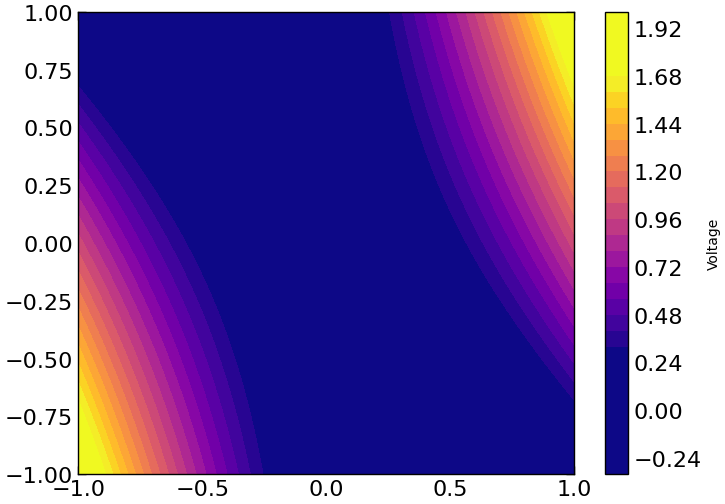

In [24]:
plt.contourf(x, y, z, levels = 30, vmin = 0.3, vmax = 1.68, cmap = 'plasma')
plt.colorbar(label = 'Voltage')

Can make them more dense ny changing levels and also can change colormap

* See https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py

Can use `vmin` and `vmax` to adjust the color range

* See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html for all settings

## Contour plot

<a list of 28 text.Text objects>

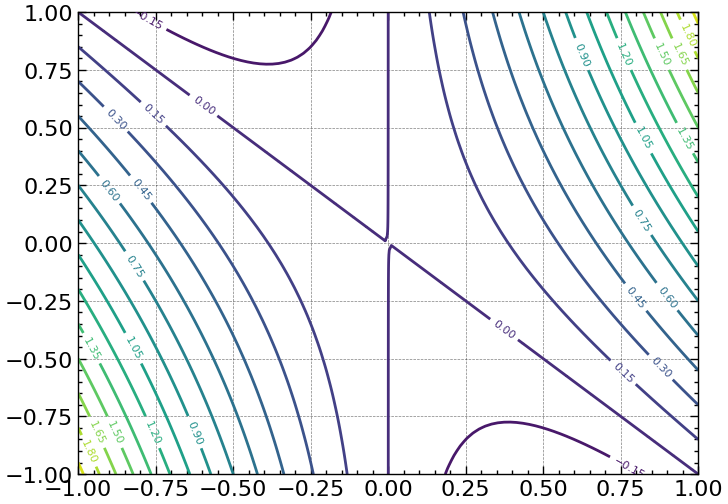

In [25]:
cs = plt.contour(x, y, z, levels = 20)
plt.clabel(cs, fontsize = 8)

## 3D Surface Plot

3D surface plots are generally not preferred, however they work well in animations.

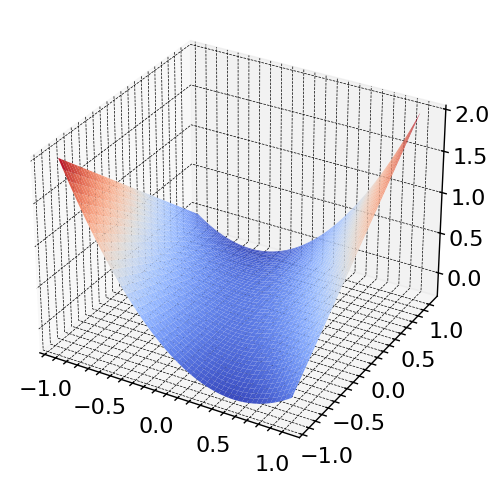

In [26]:
fig, ax = plt.subplots(subplot_kw = {'projection': '3d'})
ax.plot_surface(x, y, z, cmap = 'coolwarm')

## StreamPlots

For plotting vector fields

In [27]:
w = 3
_ = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(_, _)
U = -1 -X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

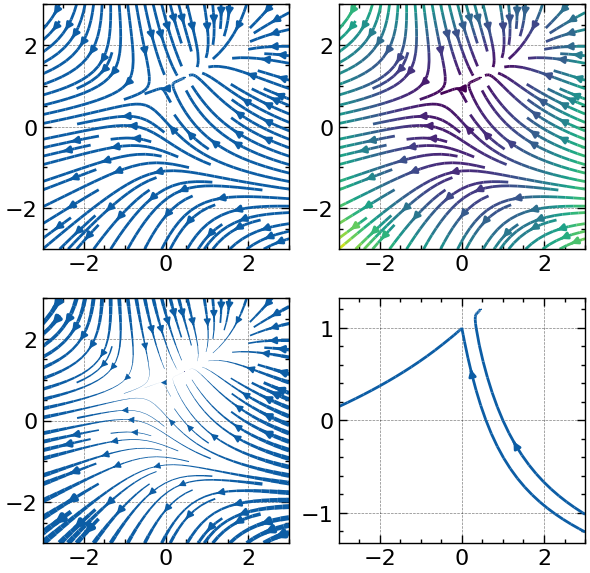

In [28]:
fig, axes = plt.subplots(2, 2, figsize = (7, 7))
ax = axes[0][0]
ax.streamplot(X, Y, U, V)
ax = axes[0][1]
ax.streamplot(X, Y, U, V, color = speed)
ax = axes[1][0]
lw = 5*speed / speed.max()
ax.streamplot(X, Y, U, V, linewidth = lw)
ax = axes[1][1]
seedpoints = np.array([[0, 1], [1, 0]])
ax.streamplot(X, Y, U, V, start_points = seedpoints)

## Image reading

In [29]:
im = plt.imread('../images/flower.png')

Plot image

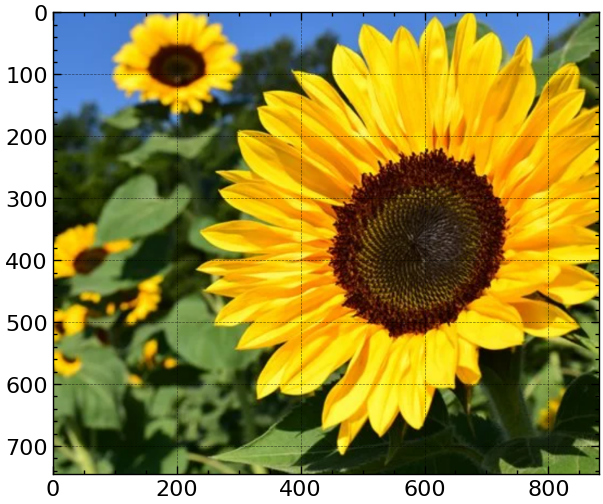

In [30]:
plt.imshow(im)

## Animations

Animations require relating the time of your problem to the frame of the animation, then specifying the frames per second

* Below is a  wave moving at 3m/s. Translate this into an animation

In [3]:
def f(x, t):
    return np.sin(x - 3*t)

x = np.linspace(0, 10*np.pi, 1000)

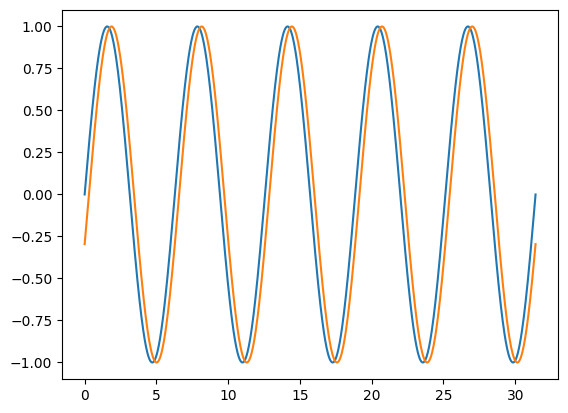

In [4]:
plt.plot(x, f(x, 0))
plt.plot(x, f(x, 0.1))

In [5]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

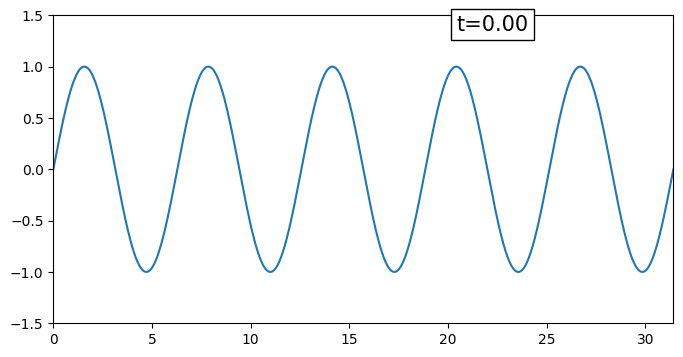

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1, = plt.plot([], [])
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)
ax.set_xlim(0, 10*np.pi)
ax.set_ylim(-1.5, 1.5)

def animate(i):
    ln1.set_data(x, f(x, 1/50*i))
    time_text.set_text('t={:.2f}'.format(i/50))

ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('../images/ani.gif', writer='pillow', fps = 50, dpi = 100)

In [9]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_, _)
z = x**2 + x*y

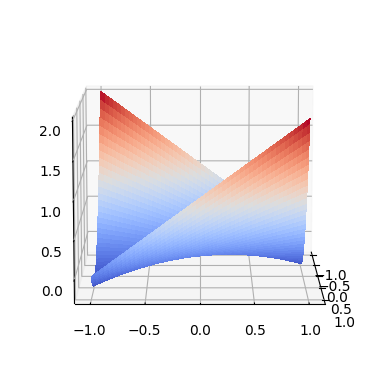

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=0)

def animate(i):
    ax.view_init(elev=10, azim=3*i)

ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
ani.save('../images/ani2.gif', writer='pillow', fps = 30, dpi = 100)